<a href="https://colab.research.google.com/github/poolGolez/project-redos/blob/main/random_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Networks

In [1]:
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
import math

## Overview

A random network model $G(N,p)$ is specified by the following parameters:
* $N$, the number of nodes, and
* $p$, the probability that the two nodes are connected.

Futhermore, we use $L$ to denote the *maximum* number of links a graph with $N$ nodes can have and is computed as:

$L = \binom{N}{2} = \frac{N(N-1)}{2}$

In [2]:
N = 10
p = 0.5

G = nx.binomial_graph(N, 0.5, seed=42)

In [3]:
print(f"A sample random network, G, with N=100 and p=0.5.")
print(f"Number of nodes: {len(G.nodes)}")
print(f"Number of links: {len(G.edges)}")

A sample random network, G, with N=100 and p=0.5.
Number of nodes: 10
Number of links: 21


A random graph `G(N,p)` will have, at most, `L` = `C(N,2)` links (edges).

In [4]:
L = math.comb(N,2)

print(f"Maximum number of edges: {L}")

Maximum number of edges: 45


## Link Distribution

The `G(N, p)` model is a family of graphs with different number of links as tweaked by the `p` parameter. Given that `p` indicates the probability that two nodes form a link, the link distribution follows a binomial distribution

In [5]:
from scipy.stats import itemfreq

graph_count = 1000

def generate_graphs(N, p, count=1000):
  rng = np.random.default_rng(42)
  return [nx.binomial_graph(N, p, seed=seed.item()) \
          for seed in rng.integers(low=0, high=1024, size=graph_count)]

Graphs = generate_graphs(N, p, graph_count)

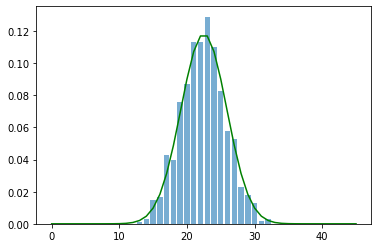

In [6]:
from scipy.stats import binom

def plot_edge_distributions(Graphs):
  edges = [len(G.edges) for G in Graphs]
  e, count = np.unique(edges, return_counts=True)
  count = count/float(graph_count)
  plt.bar(e, count, alpha=0.6)

def plot_binomial_distribution(L, p):
  dist = np.array([binom.pmf(k, L, p) for k in range(L+1)])
  plt.plot(dist, color='green')


plot_edge_distributions(Graphs)
plot_binomial_distribution(L, p)
plt.show()

### 🔖The link distribution of a random model $G(N,p)$ follows a binomial distribution $P(x:L,p)$.

> Using the binomial distribution, one can compute the probability of a $G(N,p)$ graph instance having $e$* links, $p_e$, using the formula below:

$p_{e} = \binom{L}{e} \cdot p^{e} \cdot (1-p)^{L-e}$

> The average number of links of a random model $G(N, p)$ can be determined via the binomial distribution:

$<L> = L \cdot p$



---


$^*$ $l$ looks like the number $1$ so using $e$ instead (another name for link is **e**dge )

## Node Degree

The degree of a node n, $n_k$, is the number of links of that node.

### 🔖The sum of the degree of the nodes in a graph is twice the nummber of the graph's links.

$∑k = 2 \cdot L$

In [92]:
N = 1024
p = 0.002951274
G = nx.binomial_graph(N, p, seed=42)

print("Example graph of random network model G(100, 0.5)")
print(f"Number of links: {G.number_of_edges()}")
print(f"Sum of node degrees: {sum(nx.degree_histogram(G))}")

nx.info(G)

Example graph of random network model G(100, 0.5)
Number of links: 1512
Sum of node degrees: 1024


'Graph with 1024 nodes and 1512 edges'

### Distribution

### 🔖The node degree distribution of an instance of a random network model follows th binomial distribution $P(x:N-1,p)$.

> Looking at $n_k$ as the probability that a node $n$ forms a link to the other nodes, the maximum number of links a node can have is $N-1$; it is connected to all other nodes.

> Consequently, the probability $p_k$ that a node $n$ in a random network graph has a degree of $k$, can be calculated as follows:

$p_k = \binom {N-1} {k} \cdot p^k \cdot (1-p)^{(N-1)-k}$

> And the average degree of a graph (still following the binomial distribution) can be computed as:

$<k> = (N-1) \cdot p$

/usr/local/lib/python3.8/dist-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


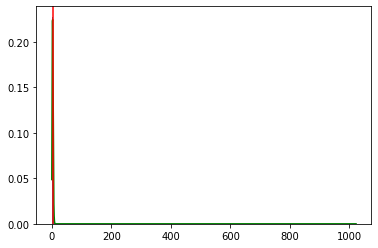

In [93]:
def plot_degree_distribution(G):
  k_count = np.array(nx.degree_histogram(G))
  normalized_k_count = k_count/k_count.sum()
  plt.bar(np.arange(len(normalized_k_count)), normalized_k_count)

plot_degree_distribution(G)
plot_binomial_distribution(N-1, p)

k_mean = (N-1) * p
plt.axvline(x=k_mean, color='red', label='<k>')
plt.show()

## Evolution

### Greatest Component

In [94]:
# nx.draw(G)

In [95]:
len(list(nx.connected_components(G)))

68

In [96]:
len(max(nx.connected_components(G)))

955

### Phases

**Subcritical Regime**: $0 < \left< k \right> < 1$; $\left(p < \frac{1}{N}\right)$

**Critical Point**: $\left< k \right> = 1$; $\left(p = \frac{1}{N}\right)$

**Supercritical Regime** $1 <\left< k \right> < \log(N)$; $\left(p > \frac{1}{N}\right)$

**Connected Regime** $\left< k\right> > \log(N)$
